In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
data = pd.read_csv(r'D:\Datasets\insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
data.shape

(1338, 7)

In [4]:
data.size

9366

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data['sex'] = np.where(data['sex']=='male',1,0)
data['smoker'] = np.where(data['smoker']=='yes',1,0)
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [7]:
c = pd.get_dummies(data['region'],drop_first=True)
data = pd.concat([data,c],axis=1)
data.head()

,age,sex,bmi,children,smoker,region,expenses,northwest,southeast,southwest
0,19,0,27.9,0,1,southwest,16884.92,0,0,1
1,18,1,33.8,1,0,southeast,1725.55,0,1,0
2,28,1,33.0,3,0,southeast,4449.46,0,1,0
3,33,1,22.7,0,0,northwest,21984.47,1,0,0
4,32,1,28.9,0,0,northwest,3866.86,1,0,0


In [8]:
data.drop('region',axis=1,inplace=True)

In [9]:
data.head()

,age,sex,bmi,children,smoker,expenses,northwest,southeast,southwest
0,19,0,27.9,0,1,16884.92,0,0,1
1,18,1,33.8,1,0,1725.55,0,1,0
2,28,1,33.0,3,0,4449.46,0,1,0
3,33,1,22.7,0,0,21984.47,1,0,0
4,32,1,28.9,0,0,3866.86,1,0,0


In [10]:
x = data.drop('expenses',axis=1)
y = data['expenses']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=101)

In [12]:
from sklearn.preprocessing import RobustScaler
rob = RobustScaler()
x_train = pd.DataFrame(rob.fit_transform(x_train),columns=x_train.columns)
x_test = pd.DataFrame(rob.fit_transform(x_test),columns=x_test.columns)

In [13]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [14]:
dtr.score(x_train,y_train)

1.0

In [15]:
dtr.score(x_test,y_test)

0.7082802170075063

# Manual HyperParameter Tuning


### 1 - criterion - (default = 'squared_error')

Note I am using the old version check for the changes in official documentation here - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [16]:
dtr1 = DecisionTreeRegressor(criterion='mae')   
dtr1.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mae')

In [17]:
y_pred1 = dtr.predict(x_test)

In [18]:
dtr1.score(x_train,y_train)

1.0

In [19]:
dtr1.score(x_test,y_test)

0.6726753795501554

### 2 - splitter - (default = 'best')

#### if splitter is selected as random it becomes extratreeregressor

In [20]:
dtr2 = DecisionTreeRegressor(splitter='best') 
dtr2.fit(x_train, y_train)

DecisionTreeRegressor()

In [21]:
y_pred2 = dtr2.predict(x_test)

In [22]:
dtr2.score(x_train ,y_train)

1.0

In [23]:
dtr2.score(x_test, y_test)

0.7067001908929151

### 3 - max_depth (default = None)

In [24]:
dtr3 = DecisionTreeRegressor(max_depth=4)
dtr3.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [25]:
y_pred3 = dtr3.predict(x_test)

In [26]:
dtr3.score(x_train, y_train)

0.873443261765262

In [27]:
dtr3.score(x_test,y_test)

0.8366907031571059

#### check the depth of the tree below in the figure!

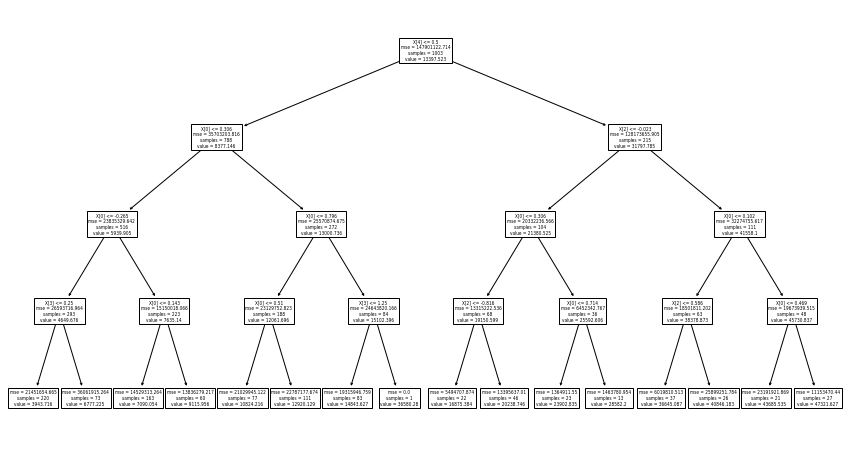

In [28]:
plt.figure(figsize=(15,8))
from sklearn import tree
tree.plot_tree(dtr3)
plt.show()

### 4 - min_samples_split (default=2)

In [29]:
dtr4 = DecisionTreeRegressor(min_samples_split=200)
dtr4.fit(x_train ,y_train)

DecisionTreeRegressor(min_samples_split=200)

In [30]:
y_pred4 = dtr4.predict(x_test)

In [31]:
dtr4.score(x_train ,y_train)

0.8486244130440108

In [32]:
dtr4.score(x_test, y_test)

0.8307527221353794

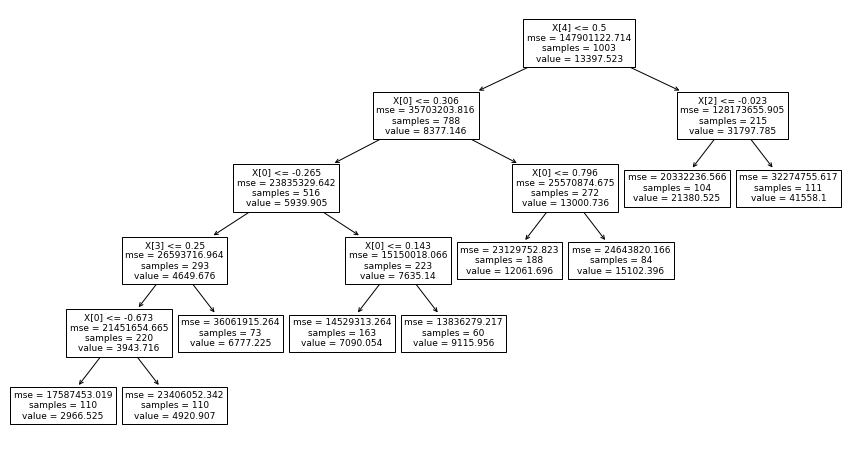

In [33]:
plt.figure(figsize=(15,8))
from sklearn import tree
tree.plot_tree(dtr4)
plt.show()

#### see if the samples are only above 200 then only split happens else, that particular node becomes leaf node

### 5 - min_samples_leaf (default=1)

In [34]:
dtr5 = DecisionTreeRegressor(min_samples_leaf=100)
dtr5.fit(x_train ,y_train)

DecisionTreeRegressor(min_samples_leaf=100)

In [35]:
y_pred5 = dtr5.predict(x_test)

In [36]:
dtr5.score(x_train, y_train)

0.8461435932539034

In [37]:
dtr5.score(x_test, y_test)

0.8268449771919969

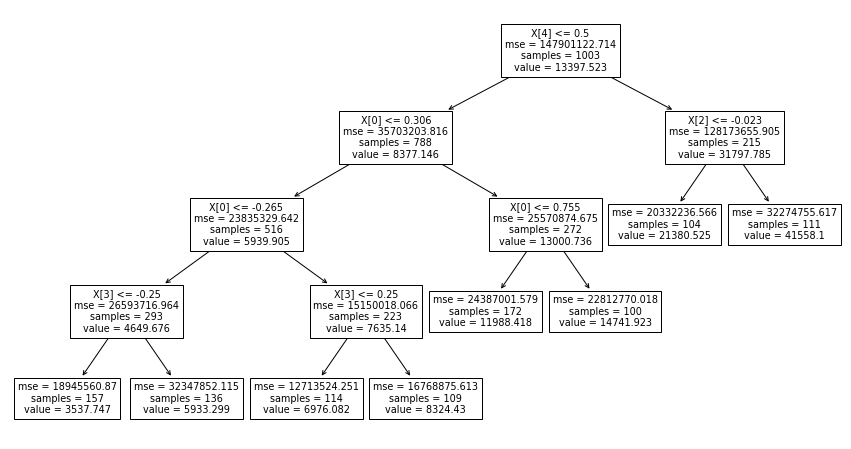

In [38]:
plt.figure(figsize=(15,8))
from sklearn import tree
tree.plot_tree(dtr5)
plt.show()

#### see 'minimum' number of samples at leaf node

### 6 - max_features (default=None)

In [39]:
dtr6 = DecisionTreeRegressor(max_features='sqrt')
dtr6.fit(x_train ,y_train)

DecisionTreeRegressor(max_features='sqrt')

In [40]:
y_pred6 = dtr6.predict(x_test)

In [41]:
dtr6.score(x_train, y_train)

1.0

In [42]:
dtr6.score(x_test, y_test)

0.3786453128578181

### 7 - max_leaf_nodes (default=None)

In [43]:
dtr7 = DecisionTreeRegressor(max_leaf_nodes=10)
dtr7.fit(x_train ,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [44]:
y_pred7 = dtr7.predict(x_test)

In [45]:
dtr7.score(x_train, y_train)

0.8656533012874325

In [46]:
dtr7.score(x_test, y_test)

0.829513763577163

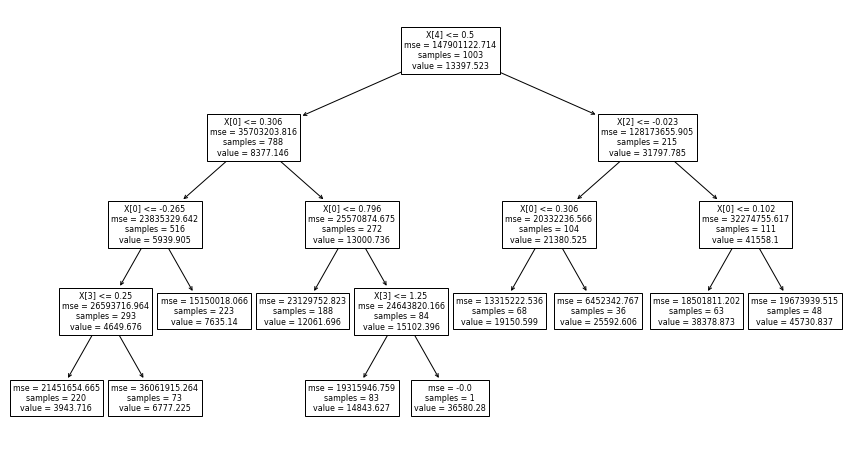

In [47]:
plt.figure(figsize=(15,8))
from sklearn import tree
tree.plot_tree(dtr7)
plt.show()

#### count the leaf nodes..there will be exactly 10 of them!

### 8 -  ccp_alpha

In [48]:
dtr8 = DecisionTreeRegressor()
dtr8.fit(x_train,y_train)
path = dtr.cost_complexity_pruning_path(x_train, y_train)

In [49]:
ccp_alphas,impurities = path.ccp_alphas, path.impurities

In [50]:
ccp_alphas

array([0.00000000e+00, 8.42472544e-06, 8.42473194e-06, 8.42474215e-06,
       1.12163509e-05, 2.87138319e-05, 3.36989092e-05, 6.82452639e-05,
       8.37986058e-05, 8.79361934e-05, 1.34795613e-04, 1.34795726e-04,
       1.40029911e-04, 1.40029918e-04, 1.56331008e-04, 1.85493519e-04,
       1.86706558e-04, 2.95563329e-04, 4.12811566e-04, 4.21934197e-04,
       4.31156530e-04, 4.31156530e-04, 6.14207380e-04, 6.25390496e-04,
       7.05932206e-04, 7.91425724e-04, 8.68594213e-04, 9.35643075e-04,
       1.04810565e-03, 1.54416749e-03, 1.63315054e-03, 1.66944167e-03,
       1.70613161e-03, 1.70613163e-03, 1.82055501e-03, 1.95433699e-03,
       1.97412762e-03, 2.17751753e-03, 2.28295115e-03, 2.43750415e-03,
       2.52367896e-03, 2.77647059e-03, 2.99227319e-03, 4.19242266e-03,
       4.19242272e-03, 4.60697908e-03, 4.97786640e-03, 5.00942172e-03,
       5.00942174e-03, 6.14162513e-03, 6.85309405e-03, 7.04765703e-03,
       7.39263875e-03, 7.81734796e-03, 7.81734796e-03, 7.81980724e-03,
      

In [51]:
impurities

array([-1.91204332e-08,  8.40560501e-06,  1.68303369e-05,  2.52550791e-05,
        3.64714300e-05,  6.51852620e-05,  9.88841711e-05,  1.67129435e-04,
        2.50928041e-04,  3.38864234e-04,  4.73659847e-04,  6.08455573e-04,
        7.48485484e-04,  8.88515402e-04,  1.04484641e-03,  1.23033993e-03,
        1.41704649e-03,  1.71260982e-03,  2.12542138e-03,  2.54735558e-03,
        2.97851211e-03,  3.40966864e-03,  4.02387602e-03,  4.64926651e-03,
        5.35519872e-03,  6.14662444e-03,  7.01521866e-03,  7.95086173e-03,
        8.99896738e-03,  1.05431349e-02,  1.21762854e-02,  1.38457271e-02,
        1.55518587e-02,  1.72579903e-02,  1.90785453e-02,  2.10328823e-02,
        2.30070100e-02,  2.51845275e-02,  2.74674786e-02,  2.99049828e-02,
        3.24286617e-02,  3.52051323e-02,  3.81974055e-02,  4.23898282e-02,
        4.65822509e-02,  5.11892300e-02,  5.61670964e-02,  6.11765181e-02,
        6.61859398e-02,  7.23275650e-02,  7.91806590e-02,  8.62283160e-02,
        9.36209548e-02,  

In [52]:
regs = []
for ccp_alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    reg.fit(x_train, y_train)
    regs.append(reg)

<Figure size 2160x576 with 0 Axes>

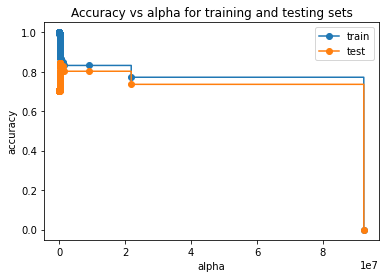

In [53]:
plt.figure(figsize=(30,8))
train_scores = [reg.score(x_train, y_train) for reg in regs]
test_scores = [reg.score(x_test, y_test) for reg in regs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [54]:
#lets try with ccp_alpha as 0.85 * (10**7)

In [55]:
dtr8 = DecisionTreeRegressor(ccp_alpha=0.85*(10**7))
dtr8.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=8500000.0)

In [56]:
y_pred = dtr8.predict(x_test)

In [57]:
dtr8.score(x_train, y_train)

0.8318016263714915

In [58]:
dtr8.score(x_test,y_test)

0.8023697763659341

# HyperParameter Tuning using RandomizedSearchCV

In [59]:
DecisionTreeRegressor(criterion=)

SyntaxError: invalid syntax (<ipython-input-59-ed51a01ceb38>, line 1)

In [ ]:
params = {
    'criterion' : ["mse", "friedman_mse", "mae"],
    'splitter':['best','random'],
    'max_depth':[int(i) for i in range(1,50,1)],
    'min_samples_split':[int(i) for i in range(2,50,1)],
    'min_samples_leaf':[int(i) for i in range(1,50,1)],
    'max_features':['sqrt','log2',None],
    'max_leaf_nodes' : [int(i) for i in range(1,100,1)]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
dtreg = DecisionTreeRegressor()
random_cv_dtreg = RandomizedSearchCV(estimator = dtreg , param_distributions=params , n_iter = 100 , cv = 5 , n_jobs = 7,verbose=True)
random_cv_dtreg.fit(x_train,y_train)

In [ ]:
best_params = random_cv_dtreg.best_estimator_
best_params

In [ ]:
dtr_final = DecisionTreeRegressor(criterion='mae', max_depth=8, max_leaf_nodes=81,
                      min_samples_leaf=33, min_samples_split=16)

In [ ]:
dtr_final.fit(x_train, y_train)

In [ ]:
dtr_final.score(x_train, y_train)

In [ ]:
dtr_final.score(x_test, y_test)